In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Regression and Objective Functions


Is there some way we can we determine which trend line is "the best"? . Given a data set $\{(X_1,Y_1),...,(X_n,Y_n)\}$ consisting of observations of two variables, we want to find a function $f(x)$ so that $f(X_i)$ gives a prediction for $Y_i$. In this case we will look at linear functions $f(x)=a+b x$, and the process of finding a good choice for $a$ and $b$ is known as linear regression.

If $f(x)=a+b x$ is a candidate for our regression function, the $i$-th residual is 
$$\epsilon_i = Y_i - f(X_i) = Y_i-(a+b X_i).$$ 

The residual is a measure of error, measuring the difference between the actual value of $Y_i$ and the value $b X_i+a$ predicted by the model. 

<img src="Residuals.png" alt="Residuals" />

Generally, speaking better models have residuals with lower absolute value. However, you can almost always change $b$ and $a$ to lower some residuals at the cost of increasing others. To decide which regression line $f(x)=a+b x$ is best we must choose an objective function. In this case, it is a way of combining the residuals into a measure of the overall error.

One common way of choosing the model $Y=a+b X$, is known as Ordinary Least Squares Regression (OLS). In Ordinary Least Square Regression we pick the regression line that minimizes the residual sum of squares, RSS, that is

$$\textrm{RSS} = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (a+bX_i-Y_i)^2.$$

One big reason for using OLS, is the fact it is relatively easy to compute. In fact explicit formulas, can be given for $a$ and $b$. Namely, if $\overline{x}$ and $\overline{y}$ are the sample means 
$$\overline{x} = \frac{\sum_{i=1}^n x_i}{n} \text{ and } \overline{y} = \frac{\sum_{i=1}^n y_i}{n},$$
then 
$$ b = \frac{\sum_{i=1}^n \left(x_i-\overline{x}\right)\left(y_i-\overline{y}\right)}{\sum_{i=1}^n \left(x_i-\overline{x}\right)^2} \textrm{ and } a = \overline{y}-b \overline{x}.$$

These formulas can be hard to evaluate by hand for large data sets, but can be computed quickly by your computer. 

Another common choice for the objective function, is the Sum of Absolute Errors

$$\textrm{SAE} = \sum_{i=1}^n |m X_i+b-Y_i| = \sum_{i=1}^n |\epsilon_i|.$$

While the Sum of Absolute Errors itself might be easier to compute by hand, It turns out it is a bit harder to find the linear function $f(x)$ which minimizes the Sum of Absolute Errors. This is in part because, there maybe more than one line which minimizes the Sum. However, this approach does have some advantages. Regressions done with Sum of Absolute Errors tends to be more *robust*, behaving better if the data contains outliers or the residuals are non-normal. 

## Ordinary Least Squares Regression

Let's implement some code that can compute ordinary least squares regressions.

In [3]:
def ols(x,y):
    """ Compute slope of OLS for two np.arrays"""
    #initialize to to NaN, incase we can't compute slope.
    b,a = float("NaN"),float("NaN")
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b = sum((x-x_bar)*(y-y_bar))/sum((x-x_bar)**2)
    a = y_bar-b*x_bar
    return np.array([b,a])

# To confirm this works let's check by testing on a perfectly correlated data set
x = np.arange(0,10)
y = 3*x+0.5

ols(x,y)

array([3. , 0.5])

# Computing and Interpreting Least Square Regressions

Let's compute a least squares regression, for the housing data set, between floor_size and sold_price.

In [7]:
housing_df = pd.read_csv("../../data/Housing.csv")
housing_df.head()

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
0,2068,3,2003,Aug2015,195500,6,768,3
1,3372,3,1999,Dec2015,385000,6,480,2
2,3130,3,1999,Jan2017,188000,7,400,2
3,3991,3,1999,Nov2014,375000,8,400,2
4,1450,2,1999,Jan2015,136000,7,200,1


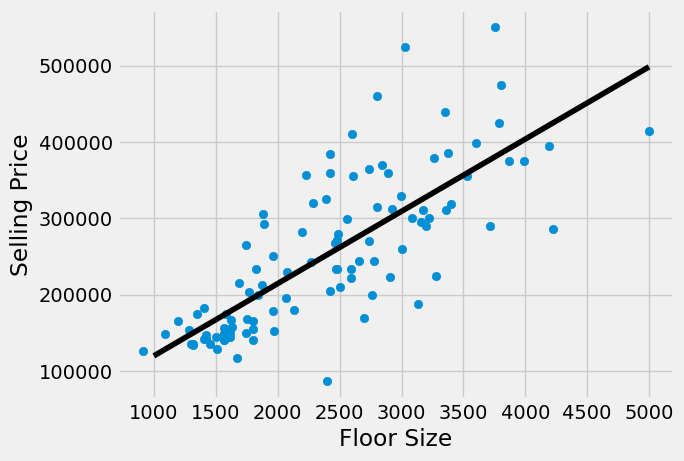

In [8]:
lin_regress   = ols(housing_df['floor_size'],housing_df['sold_price'])
lin_regress_p = (lambda t: t*lin_regress[0]+lin_regress[1])
plt.scatter(housing_df['floor_size'],housing_df['sold_price'])
plt.xlabel("Floor Size")
plt.ylabel("Selling Price")
plt.plot(np.arange(1000,5000), lin_regress_p(np.arange(1000,5000)), "-",color="black");
plt.show()

One advantage that a linear regression has over more complicated approaches like deep learning is that it's easy to interpret the resulting model. For the floor size model above we can see get linear polynomial $p(x)=94.66x + 25181.19$.

In [23]:
lin_regress

array([   94.6602687 , 25181.18878724])

In [24]:
lin_regress_p(2500)

261831.86053480077

# Interpretation of Regressions

In general, when performing a regression between variables $Y$ and $X$. We can think of the resulting regression function $f(x)$, as giving a prediction $f(X_i)$ of the value of $Y_i$. For instance, for the linear regression above between floor size and sell price, $p(2500) = 261831$ which means the model predicts the average price of a $2500$ square foot apartment to be $\$261831$. While there are no examples in our data frame of apartments with exactly $2500$ square feet, there are some that are within that range and we can see that the price is a little high, but not unreasonable.

In [43]:
housing_df.loc[ abs(housing_df['floor_size']-2500) < 50]

,floor_size,bed_room_count,built_year,sold_date,sold_price,room_count,garage_size,parking_lot
14,2476,4,2006,Dec2014,233000,9,440,2
43,2468,5,1995,May2015,233000,7,484,2
51,2482,3,1997,Apr2017,271000,7,520,2
78,2462,4,2008,Jul2017,267500,10,200,1
81,2504,4,2005,Aug2016,210200,7,440,2
84,2488,3,1995,Mar2015,279000,8,638,2


Linear regressions have an advantage over other more complicated methods such as deep learning, in that the regression function is easily interpretable. For instance, with the regression function between floor_size and sell_price
$$ p(x)=94.66x + 25181.19.$$
The slope of this line has an interpretation, $\$94.66$ is the average increase in price of an apartment for every $1$ square foot increase in floor price. The intercept $25181.19$ is the prediction $p(0)$ of the sell_price of an apartment with $0$ square feet. Since no such apartment can exist, the intercept is less immediately interpretable.

This example also illustrates a shortcoming of regressions. While they can be used to give predictions, if those values fall far outside the current data, the predictions likely will not be accurate.

## Evaluating Regression Model Performance 

Often after building a regression model $Y = b X + a$, we want a measure of how it performs. Namely how much of the variation in $Y$ is explained by the variation in $X$. 

For instance, looking at the two graphs below, we can see than on the left our linear regression line explains most of the variation in $Y$, where as on the right $Y$ can be quite far from the regression line.

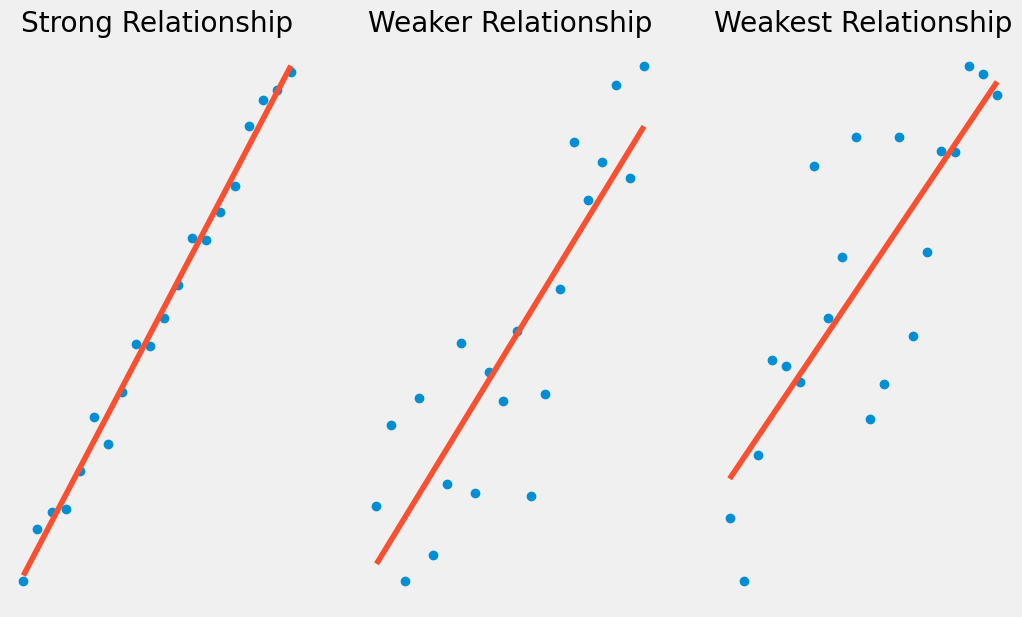

In [18]:
fig, axs = plt.subplots(1, 3);
fig.set_size_inches(11.5, 7)
np.random.seed(123)
x = np.arange(0, 20)
y = x-1+np.random.normal(0,0.5,20)
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
axs[ 0].plot(x, y, "o");
axs[0].plot(x, p(x), "-");
axs[0].set_title('Strong Relationship');
axs[0].axis('off');

x = np.arange(0, 20)
y = x-1+np.random.normal(0,3,20)
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
axs[1].plot(x, y, "o");
axs[1].plot(x, p(x), "-");
axs[1].set_title('Weaker Relationship');
axs[1].axis('off');

x = np.arange(0, 20)
y = x-1+np.random.normal(0,6,20)
z = np.polyfit(x, y, 1) 
p = np.poly1d(z)
axs[2].plot(x, y, "o");
axs[2].plot(x, p(x), "-");
axs[2].set_title('Weakest Relationship');
axs[2].axis('off');

Recall we have a measure already of the error which is not explained by our regression model. Namely, the Residual Sum of Squares
$$\sum_{i=1}^n (a+b X_i-Y_i)^2.$$

However, while this is useful for comparing data from the same data set, it's not a good measure of overall model performance. For instance, if I simply rescale $Y$, dividing every $Y_i$ value by $10$, I can after re-running my regression to get the new regression function $f(x) = a/10+b/10 X$. I would lower my $RSS$ by a factor of $100$. 

For this reason, it's useful to compare RSS to the overall variation in $Y$. That is the Total Sum of Squares (TSS), if $\bar{Y}$ is the sample mean of $Y$ then 

$$TSS = \sum_{i=1}^n (Y_i-\bar{Y})^2.$$

Using these we can define the Coefficient of Determinantion or $R^2$

$$R^2 = \frac{TSS - RSS}{TSS}.$$

We can think of $TSS-RSS$ as denote the total amount of variation in Y that is explained by our regression model. $R^2$ then becomes the proportion of variation in $Y$ that is explained by our regression model.

In [36]:
#Code to compute R-squared
def R_Squared(x,y,coeffs):
    """ Given numpy arrays X and Y and the Coefficients of the OLS, compute R^2"""
    y_bar = np.mean(y)
    TSS = np.sum((y - y_bar)**2)
    RSS = np.sum((coeffs[0]*x+coeffs[1]-y)**2)
    return (TSS-RSS)/TSS

# Compute R^2 coefficient for our housing regression
R2 = R_Squared(housing_df['floor_size'],housing_df['sold_price'],lin_regress)
R2

0.6027784652096493

Our $R^2$ coefficient here is around $0.6$, meaning $60\%$ of the variation in sale price is explained by our regression model with floor size. 

You might recall we had another measure of the strength of a linear relationship between two variables, namely the correlation coefficient.

In [32]:
r = np.corrcoef(housing_df['floor_size'],housing_df['sold_price'])[0,1]
r

0.7763880893017673

It turns out for ordinary linear regressions that $R^2$, is the correlation coefficient squared. As the correlation coefficient is sometimes denoted $r$ this explains the name.

However, as we will see in later chapters, we can define $R^2$ for other regression models as well, and this will not hold in those cases.

In [37]:
print("corr^2 == ",round(r**2,5))
print("R^2 == ",round(R2,5))

corr^2 ==  0.60278
R^2 ==  0.60278
